# Random Forest


## Load in Libraries

In [ ]:
# Basic working with data libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Library including linear/logistic regression
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

## Exercise 1. Breast Cancer Data

This is the same one we used for logistic regression. [A description of the variables can be found here](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)).

As before, the documentation is terrible. There is an important face missing: the `malignant` column is a "2" when benign, and a "4" when malignant. You'll have to convert this to a boolean yourself.

Let's use the dataset to predict whether a tumor is malignant or benign. Two important questions, related to comparing it to logistic regression:

1. How does it compare in terms of accuracy?
2. How does it compare in terms of explainability?

In [ ]:
cancer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
                  na_values="?", header=0)
cancer.columns = ["ID", "radius", "texture", "peri", "area", "smooth", "concav", "conc.pts", "symm", "fractal", "malignant"]

In [ ]:
#Yo flip this im doing random forest

In [ ]:
cancer.head()

,ID,radius,texture,peri,area,smooth,concav,conc.pts,symm,fractal,malignant
0,1002945,5,4,4,5,7,10.0,3,2,1,2
1,1015425,3,1,1,1,2,2.0,3,1,1,2
2,1016277,6,8,8,1,3,4.0,3,7,1,2
3,1017023,4,1,1,3,2,1.0,3,1,1,2
4,1017122,8,10,10,8,7,10.0,9,7,1,4


In [ ]:
cancer["malignant"] = cancer.malignant.replace([2, 4], ["benign", "malignant"])
cancer = cancer.dropna()
cancer.head()

,ID,radius,texture,peri,area,smooth,concav,conc.pts,symm,fractal,malignant
0,1002945,5,4,4,5,7,10.0,3,2,1,benign
1,1015425,3,1,1,1,2,2.0,3,1,1,benign
2,1016277,6,8,8,1,3,4.0,3,7,1,benign
3,1017023,4,1,1,3,2,1.0,3,1,1,benign
4,1017122,8,10,10,8,7,10.0,9,7,1,malignant


In [ ]:
X = cancer[["radius", "texture", "peri", "area", "smooth", "concav", "conc.pts","symm","fractal"]]
y = cancer["malignant"]

X = pd.get_dummies(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=314159)

In [ ]:
model = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

print(f"Train Accuracy: {accuracy_score(yhat_train, y_train):.2f}")
print(f"Test Accuracy:  {accuracy_score(yhat_test, y_test):.2f}")
print(f"Null Accuracy:  {y_test.value_counts(normalize=True).iloc[0]:.2f}")

Train Accuracy: 1.00
Test Accuracy:  0.98
Null Accuracy:  0.67


In [ ]:
print(model.feature_importances_)#Tells you for each of the X variables, if each were removed how much worse does the model get
print(X.columns)

[0.04654528 0.26883468 0.25907037 0.03731115 0.07135326 0.1251292
 0.11526213 0.07007942 0.00641451]
Index(['radius', 'texture', 'peri', 'area', 'smooth', 'concav', 'conc.pts',
       'symm', 'fractal'],
      dtype='object')


<Axes: xlabel='None'>

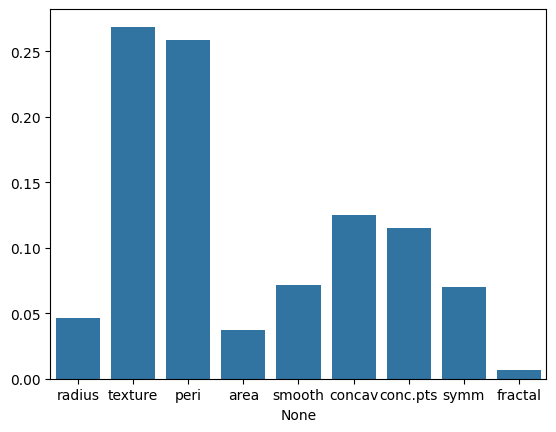

In [ ]:
sns.barplot(x = X.columns, y = model.feature_importances_) #this looks ugly so lets make a df

In [ ]:
data = {"feature":X.columns, "importance":model.feature_importances_}
df = pd.DataFrame(data)
df = df.sort_values(by="importance",ascending=False)
df.head()

,feature,importance
1,texture,0.268835
2,peri,0.259070
5,concav,0.125129
6,conc.pts,0.115262
4,smooth,0.071353


<Axes: xlabel='importance', ylabel='feature'>

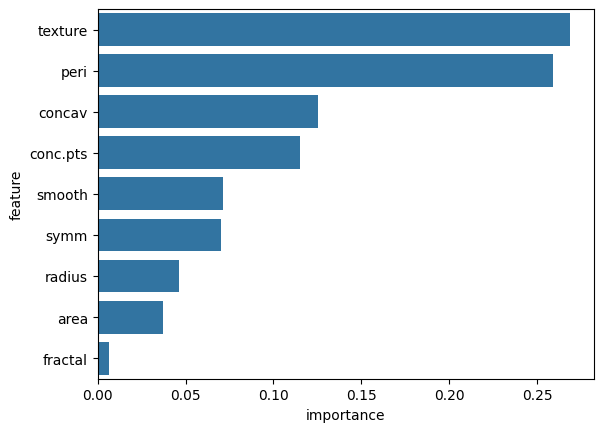

In [ ]:
sns.barplot(data = df, x = "importance", y = "feature") #this looks ugly so lets make a df

In [ ]:
X = cancer[["texture", "peri", "smooth", "concav", "conc.pts"]] #dropped fractal, symm, and area, and radius
y = cancer["malignant"]

X = pd.get_dummies(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=314159)

In [ ]:
model = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
yhat_train = model.predict(X_train) #Our accuracy only dropped a super small amount
yhat_test = model.predict(X_test)

print(f"Train Accuracy: {accuracy_score(yhat_train, y_train):.2f}")
print(f"Test Accuracy:  {accuracy_score(yhat_test, y_test):.2f}")
print(f"Null Accuracy:  {y_test.value_counts(normalize=True).iloc[0]:.2f}")

Train Accuracy: 1.00
Test Accuracy:  0.97
Null Accuracy:  0.67


Lets see how dropping some of the least important variables affects our accuracy

#Exercise 1.5 Life Expectancy

You can get the dataset [at this URL](https://raw.githubusercontent.com/Greg-Hallenbeck/HARP-325-DataSociety/main/dataset/Life%20Expectancy%20Data.csv), and the data was on [this page on kaggle](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who), but presumably originally from [the WHO website](https://www.who.int/).

Let's see if we can predict life expectancy from GDP per capita. One would expect that having money would help people live longer, but the relationship doesn't continue infinitely: billionaires don't live 1000x as long as millionaires, and so on.

Load in the dataset.

In [ ]:
life = pd.read_csv("https://raw.githubusercontent.com/Greg-Hallenbeck/HARP-325-DataSociety/main/dataset/Life%20Expectancy%20Data.csv")
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
life = life.dropna()

In [ ]:
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
X = life[['Year', 'Status', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']]
y = life['Life expectancy ']
X = pd.get_dummies(X, drop_first=True).astype("float32")


In [ ]:
X.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,2015.0,263.0,62.0,0.01,71.279625,65.0,1154.0,19.100000,83.0,6.0,8.16,65.0,0.1,584.259216,33736496.0,17.200001,17.299999,0.479,10.1,1.0
1,2014.0,271.0,64.0,0.01,73.523582,62.0,492.0,18.600000,86.0,58.0,8.18,62.0,0.1,612.696533,327582.0,17.500000,17.500000,0.476,10.0,1.0
2,2013.0,268.0,66.0,0.01,73.219246,64.0,430.0,18.100000,89.0,62.0,8.13,64.0,0.1,631.744995,31731688.0,17.700001,17.700001,0.470,9.9,1.0
3,2012.0,272.0,69.0,0.01,78.184212,67.0,2787.0,17.600000,93.0,67.0,8.52,67.0,0.1,669.958984,3696958.0,17.900000,18.000000,0.463,9.8,1.0
4,2011.0,275.0,71.0,0.01,7.097109,68.0,3013.0,17.200001,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.200001,18.200001,0.454,9.5,1.0


In [ ]:
y = y.astype("float32")
X.dtypes

,0
Year,float32
Adult Mortality,float32
infant deaths,float32
Alcohol,float32
percentage expenditure,float32
Hepatitis B,float32
Measles,float32
BMI,float32
under-five deaths,float32
Polio,float32


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=314159)

In [ ]:
model = RandomForestClassifier().fit(X_train, y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

## Exercise 2. WHO Life Expectancy Data

This is a repeat of the linear regression exercise to predict life expectancy. It's [at this URL](https://raw.githubusercontent.com/Greg-Hallenbeck/HARP-325-DataSociety/main/dataset/Life%20Expectancy%20Data.csv), and the data was on [this page on kaggle](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who), but presumably originally from [the WHO website](https://www.who.int/).

Since the decision tree isn't linear, there's no reason to take a log of the GDP or anything like that. As with Exercise 1, compare it in terms of accuracy and explainability to the linear regression model.

* Model 1: Predict Life Expectancy
* Model 2: Predict Developing/Developed status

If the model's not great, try changing the maximum depth of the tree.

## Exercise 3. Redlining

For completeness, we should also look at a classification problem which has more than two outcomes. So, let's ask the question: based on current demographics, can we determine what grade a neighborhood was given back in the 1930s?

As before, [here is the URL](https://raw.githubusercontent.com/fivethirtyeight/data/master/redlining/metro-grades.csv) for the dataset.